In [1]:
import pandas as pd
from minepy import MINE
from joblib  import Parallel,delayed
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def mic(x,y):
    '''输入为dataframe'''
    if type(x) == pd.DataFrame:
        x = x.prob.values.ravel()
        y = y.prob.values.ravel()
    m = MINE(est ='mic_e')
    m.compute_score(x,y)
    return m.mic()

def cal_raw(x,pred_list):
    result = Parallel(n_jobs=len(pred_list),verbose=10)(delayed(mic)(x,y) for y in pred_list)
    return result

def cal_matrix(pred_list):
    result = Parallel(n_jobs=len(pred_list),verbose=10)(delayed(cal_raw)(x,pred_list) for x in pred_list)
    return np.array(result)

def plot_mic_matrix(mic_matrix,ticks):
    plt.figure(figsize=(16,16))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.heatmap(mic_matrix,linewidths=1,vmax=1.0,
            square=True,linecolor='white',annot=True,xticklabels=ticks,yticklabels =ticks)


In [27]:
file_names = [file for file in os.listdir() if '_pred.txt' in file]
file_names = sorted(file_names,key=lambda x:int(x.split('_')[0][4:]))

In [28]:

pred_list = []
for file in file_names:
    pred = pd.read_csv(file)
    pred_list.append(pred)
mic_matrix = cal_matrix(pred_list)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   22.0s remaining:   51.3s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:   22.2s remaining:   22.2s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:   22.4s remaining:    9.6s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   22.9s finished


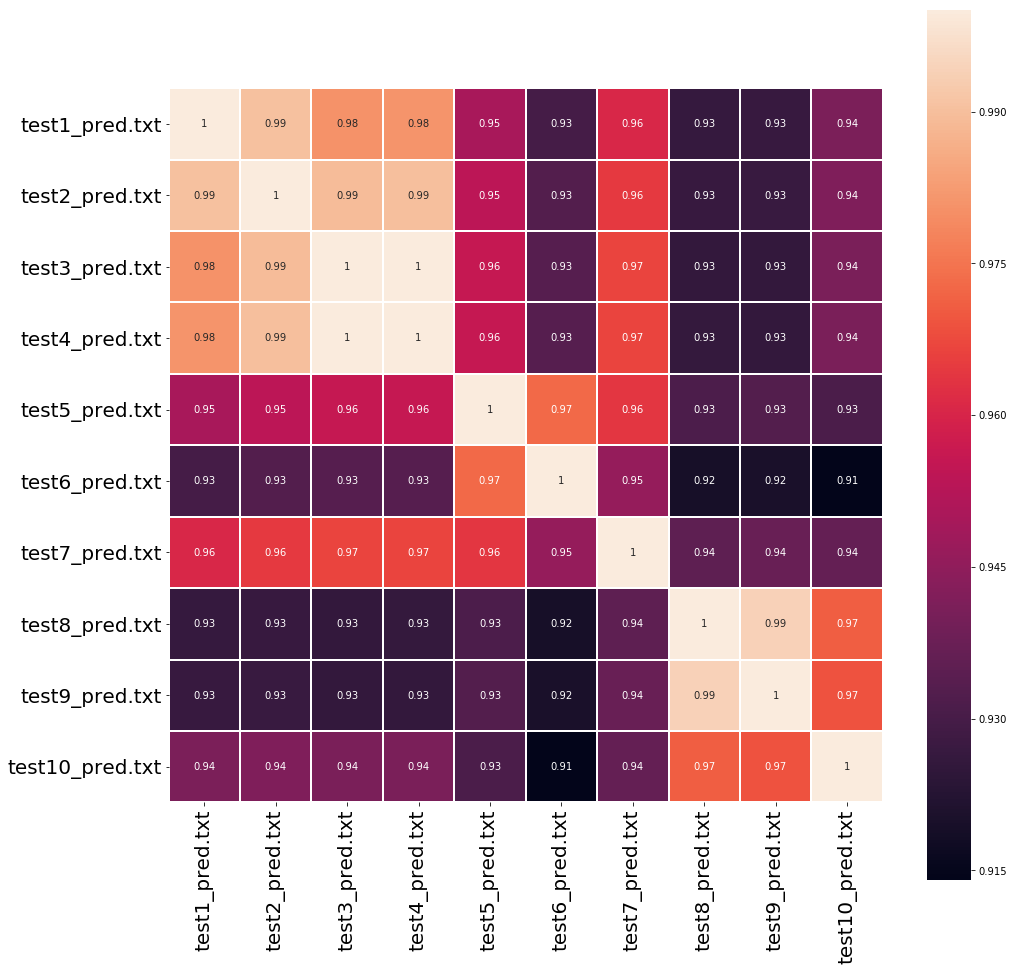

In [29]:
plot_mic_matrix(mic_matrix,file_names)